<a href="https://colab.research.google.com/github/AnikaDhawan02/23UADS4154-Anika-NNLab-2025/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training with Filter=3, Reg=0.0001, Batch=32, Opt=adam
Epoch 1/5
1875/1875 - 62s - 33ms/step - accuracy: 0.8330 - loss: 0.4874 - val_accuracy: 0.8716 - val_loss: 0.3832
Epoch 2/5
1875/1875 - 59s - 32ms/step - accuracy: 0.8865 - loss: 0.3490 - val_accuracy: 0.8870 - val_loss: 0.3572
Epoch 3/5
1875/1875 - 83s - 44ms/step - accuracy: 0.9009 - loss: 0.3141 - val_accuracy: 0.8960 - val_loss: 0.3484
Epoch 4/5
1875/1875 - 78s - 41ms/step - accuracy: 0.9089 - loss: 0.2947 - val_accuracy: 0.9021 - val_loss: 0.3212
Epoch 5/5
1875/1875 - 57s - 31ms/step - accuracy: 0.9157 - loss: 0.2787 - val_accuracy: 0.9060 - val_loss: 0.3097
Test accuracy: 0.9060

Training with Filter=3, Reg=0.0001, Batch=32, Opt=sgd
Epoch 1/5
1875/1875 - 59s - 31ms/step - accuracy: 0.6927 - loss: 0.8749 - val_accuracy: 0.7754 - val_loss: 0.6365
Epoch 2/5
1875/1875 - 81s - 43ms/step - accuracy: 0.8069 - loss: 0.5531 - val_accuracy: 0.8184 - val_loss: 0.5349
Epoch 3/5
1875/1875 - 56s - 30ms/step - accuracy: 0.8363 - loss: 0.483

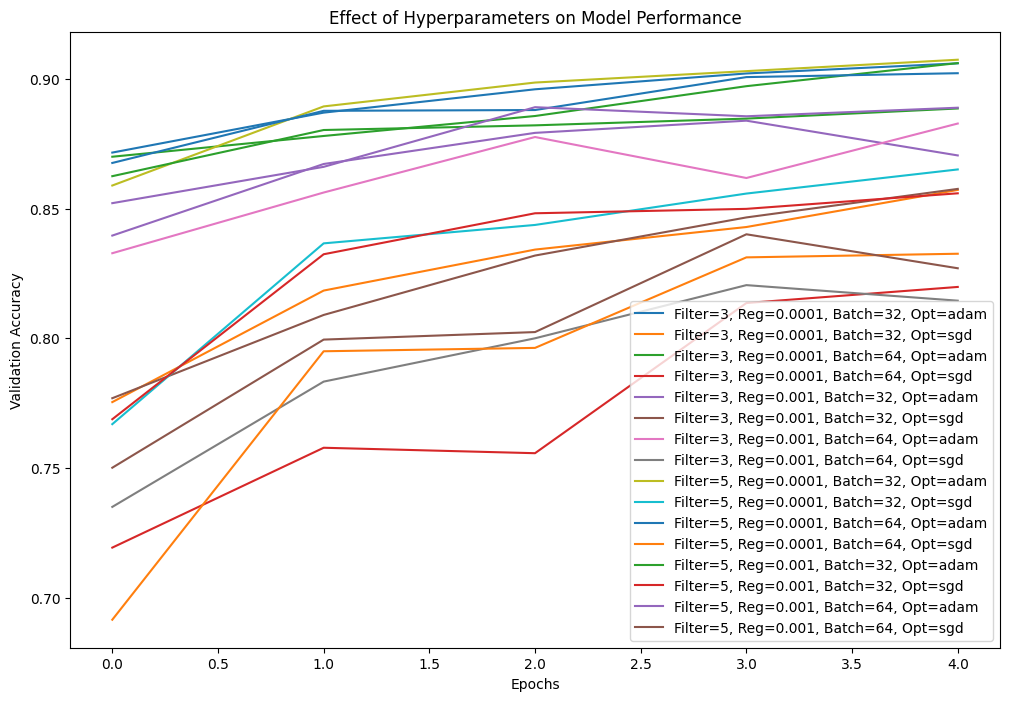

In [3]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the dataset
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data to add channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Function to create a CNN model
def create_model(filter_size=3, regularization=0.001, optimizer='adam'):
    model = keras.Sequential([
        layers.Conv2D(32, (filter_size, filter_size), activation='relu', kernel_regularizer=regularizers.l2(regularization), input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (filter_size, filter_size), activation='relu', kernel_regularizer=regularizers.l2(regularization)),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(regularization)),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Experiment with different configurations
filter_sizes = [3, 5]
regularizations = [0.0001, 0.001]
batch_sizes = [32, 64]
optimizers = ['adam', 'sgd']

results = {}

for filter_size in filter_sizes:
    for regularization in regularizations:
        for batch_size in batch_sizes:
            for optimizer in optimizers:
                key = f"Filter={filter_size}, Reg={regularization}, Batch={batch_size}, Opt={optimizer}"
                print(f"Training with {key}")
                model = create_model(filter_size, regularization, optimizer)
                history = model.fit(x_train, y_train, epochs=5, batch_size=batch_size, validation_data=(x_test, y_test), verbose=2)
                test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
                results[key] = history
                print(f"Test accuracy: {test_acc:.4f}\n")

# Plotting results
plt.figure(figsize=(12, 8))
for key, history in results.items():
    plt.plot(history.history['val_accuracy'], label=key)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Effect of Hyperparameters on Model Performance')
plt.legend()
plt.show()

